<a href="https://colab.research.google.com/github/supriyaohdar/Book-Price-Prediction/blob/main/BookPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [265]:
import pandas as pd
import numpy as np

In [266]:
#from google.colab import files
#uploaded=files.upload()

In [267]:
traindata=pd.read_excel("Data_Train.xlsx")
testdata=pd.read_excel("Data_Test.xlsx")
traindata.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [268]:
testdata.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [269]:
traindata.shape


(6237, 9)

In [270]:
testdata.shape

(1560, 8)

In [271]:
traindata.describe(include='all')

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [272]:
testdata.describe(include='all')

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,A Guardian Pick for 2019\nThe People vs. Putin...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [273]:
traindata.dtypes

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

In [274]:
testdata.dtypes

Title           object
Author          object
Edition         object
Reviews         object
Ratings         object
Synopsis        object
Genre           object
BookCategory    object
dtype: object

In [275]:
traindata.drop(columns=['Title', 'Synopsis', 'Genre','BookCategory','Reviews','Ratings'], inplace=True)
testdata.drop(columns=['Title',  'Synopsis', 'Genre','BookCategory','Reviews','Ratings'], inplace=True)
traindata.head()

,Author,Edition,Price
0,Chris Kuzneski,"Paperback,– 10 Mar 2016",220.00
1,Arun Khopkar,"Paperback,– 7 Nov 2012",202.93
2,Thomas Hobbes,"Paperback,– 25 Feb 1982",299.00
3,Agatha Christie,"Paperback,– 5 Oct 2017",180.00
4,Editors of Life,"Hardcover,– 10 Oct 2006",965.62


In [276]:

traindata['Edition Type'] = traindata['Edition'].str.split('–').str[0].str.replace(',', '')
traindata['Edition Year'] = traindata['Edition'].str.split(' ').str[-1]
traindata.head()


,Author,Edition,Price,Edition Type,Edition Year
0,Chris Kuzneski,"Paperback,– 10 Mar 2016",220.00,Paperback,2016
1,Arun Khopkar,"Paperback,– 7 Nov 2012",202.93,Paperback,2012
2,Thomas Hobbes,"Paperback,– 25 Feb 1982",299.00,Paperback,1982
3,Agatha Christie,"Paperback,– 5 Oct 2017",180.00,Paperback,2017
4,Editors of Life,"Hardcover,– 10 Oct 2006",965.62,Hardcover,2006


In [277]:
traindata.drop(columns=['Edition'], inplace=True)
traindata.head()

,Author,Price,Edition Type,Edition Year
0,Chris Kuzneski,220.00,Paperback,2016
1,Arun Khopkar,202.93,Paperback,2012
2,Thomas Hobbes,299.00,Paperback,1982
3,Agatha Christie,180.00,Paperback,2017
4,Editors of Life,965.62,Hardcover,2006


In [278]:
traindata.dtypes

Author           object
Price           float64
Edition Type     object
Edition Year     object
dtype: object

In [279]:
traindata['Edition Type'].value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
Leather Bound               1
(German)Paperback           1
Library Binding             1
(Spanish)Paperback          1
Plastic Comb                1
Board book                  1
Perfect Paperback           1
(French)Paperback           1
Product Bundle              1
(Kannada)Paperback          1
Name: Edition Type, dtype: int64

In [280]:
traindata['Edition Year'].value_counts()

2018         811
2017         757
2016         659
2015         519
2014         402
            ... 
Audiobook      1
1925           1
1905           1
NTSC           1
1981           1
Name: Edition Year, Length: 64, dtype: int64

In [281]:
traindata['Author'].value_counts()

Agatha Christie          69
Ladybird                 49
DK                       48
Herge                    34
Albert Uderzo            34
                         ..
A. Revathi, V. Geetha     1
Dashiell Hammett          1
Sally Rooney              1
Celeste Ng                1
Mary Kom                  1
Name: Author, Length: 3679, dtype: int64

In [282]:
testdata['Edition Type'] = testdata['Edition'].str.split('–').str[0].str.replace(',', '')
testdata['Edition Year'] = testdata['Edition'].str.split(' ').str[-1]
testdata.head()

,Author,Edition,Edition Type,Edition Year
0,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",Mass Market Paperback,1986
1,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",Paperback,2018
2,Danielle Steel,"Paperback,– 17 Mar 2011",Paperback,2011
3,Allen B. Downey,"Paperback,– 2016",Paperback,2016
4,Redman Gairns,"Paperback,– 26 Dec 2011",Paperback,2011


In [283]:
testdata.drop('Edition',axis=1,inplace=True)
testdata.head()

,Author,Edition Type,Edition Year
0,Sir Arthur Conan Doyle,Mass Market Paperback,1986
1,Gabriel N. Schenker,Paperback,2018
2,Danielle Steel,Paperback,2011
3,Allen B. Downey,Paperback,2016
4,Redman Gairns,Paperback,2011


In [284]:
testdata['Edition Type'].value_counts()


Paperback                1265
Hardcover                 233
Mass Market Paperback      45
Sheet music                 8
Flexibound                  4
Spiral-bound                2
(Chinese)Paperback          1
Cards                       1
Loose Leaf                  1
Name: Edition Type, dtype: int64

[]

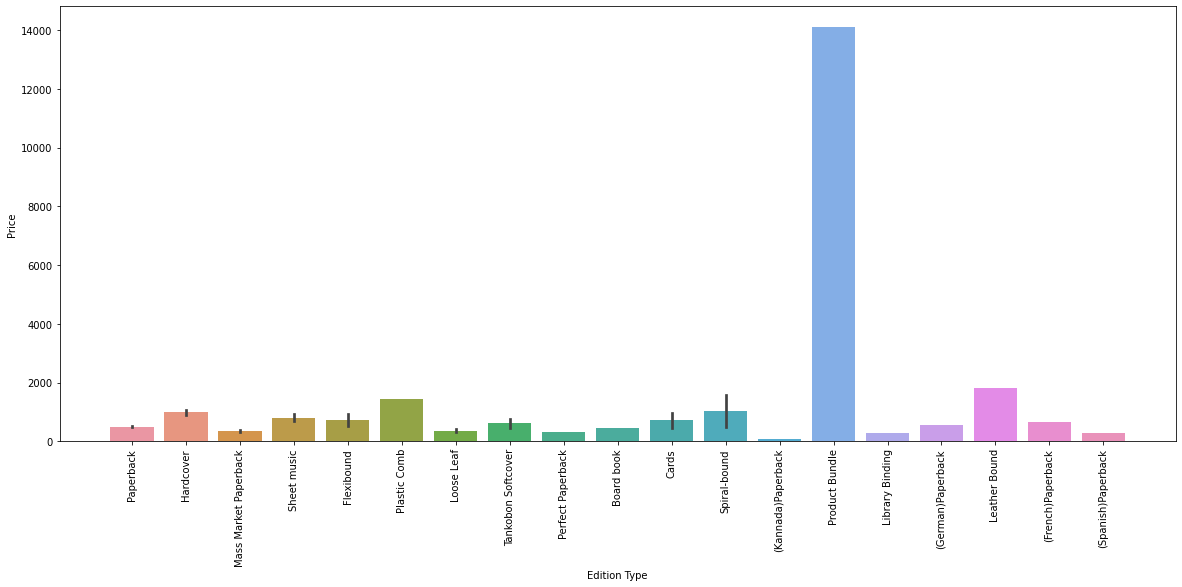

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 8))
sns.barplot(x=traindata['Edition Type'], y=traindata['Price'])
plt.xticks(rotation=90)
plt.plot()

[]

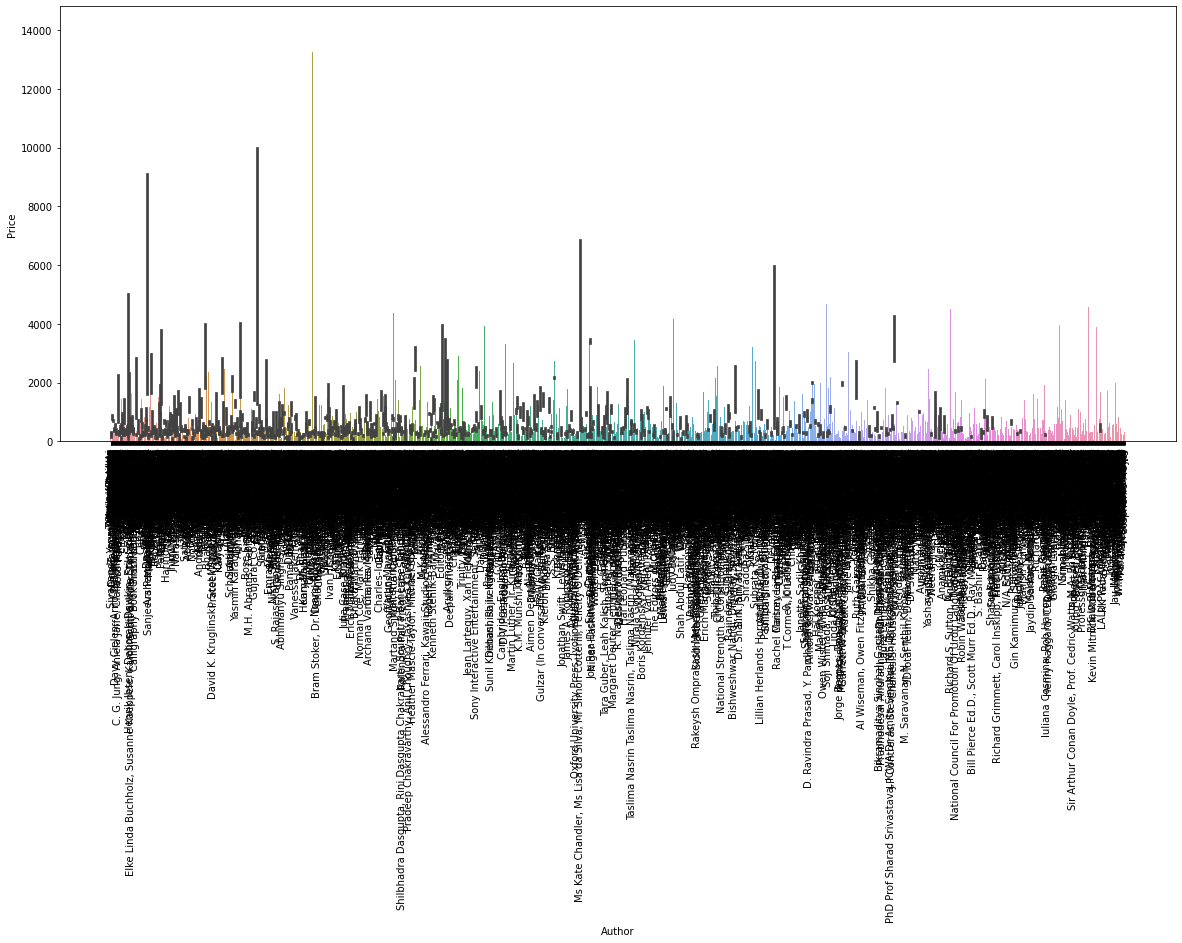

In [286]:
plt.figure(figsize=(20, 8))
sns.barplot(x=traindata['Author'], y=traindata['Price'])
plt.xticks(rotation=90)
plt.plot()

[]

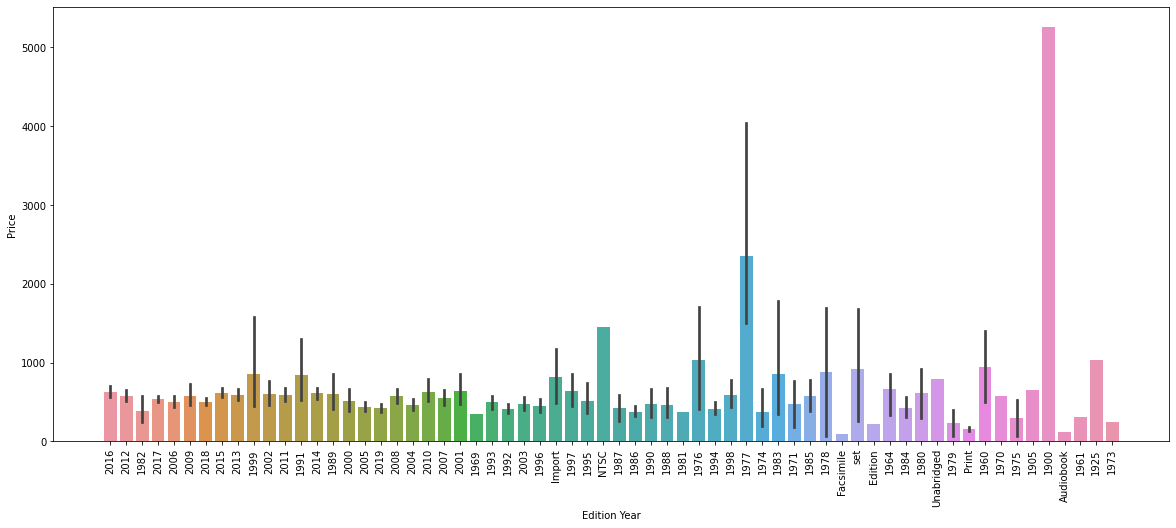

In [287]:
plt.figure(figsize=(20, 8))
sns.barplot(x=traindata['Edition Year'], y=traindata['Price'])
plt.xticks(rotation=90)
plt.plot()

In [288]:
pd.set_option('display.max_rows', 50)
x1 = traindata[traindata['Edition Year'].apply(lambda x: str(x).isalpha())]
x1

,Author,Price,Edition Type,Edition Year
169,Nelson Mandela,418.0,Paperback,Import
235,Willard A. Palmer,1453.0,Plastic Comb,NTSC
582,Barrington Barber,415.0,Paperback,Import
972,"Ivan Hissey, Curtis Tappenden",445.0,Paperback,Import
1233,Bhakti Mathur,277.0,Paperback,Import
1558,James Hadley Chase,100.0,Hardcover,Facsimile
1605,Syal,399.0,Paperback,set
1631,Ace McCloud,709.0,Paperback,Import
1643,William Shakespeare,220.0,Paperback,Edition
1769,Rick Smolan,2248.0,Hardcover,set


In [289]:
pd.set_option('display.max_rows', 50)
x2 = testdata[testdata['Edition Year'].apply(lambda x: str(x).isalpha())]
x2

,Author,Edition Type,Edition Year
97,Preeti Shenoy,Paperback,Print
178,"Jason Quinn, Sachin Nagar",Paperback,Illustrated
396,Paul Lockhart,Paperback,Print
579,A.S. Dulat,Hardcover,Import
955,ESPN Cricinfo,Paperback,Print
1179,Sam Lake,Hardcover,set
1191,Steve Haines,Paperback,Import
1408,Frank Miller,Paperback,set
1541,"Ivan Hissey, Curtis Tappenden",Paperback,Import


In [290]:
traindata = traindata[traindata['Edition Year'].apply(lambda x: str(x).isdigit())]

In [291]:
traindata.dtypes

Author           object
Price           float64
Edition Type     object
Edition Year     object
dtype: object

In [292]:
traindata['Edition Year'] = traindata['Edition Year'].astype('int64')

In [293]:
traindata.dtypes

Author           object
Price           float64
Edition Type     object
Edition Year      int64
dtype: object

In [294]:
testdata = testdata[testdata['Edition Year'].apply(lambda x: str(x).isdigit())]

In [295]:
testdata.dtypes

Author          object
Edition Type    object
Edition Year    object
dtype: object

In [296]:
testdata['Edition Year']=testdata['Edition Year'].astype('int64')
testdata.dtypes

Author          object
Edition Type    object
Edition Year     int64
dtype: object

In [297]:
traindata['Edition Year'].corr(traindata.Price)

-0.0248136947601535

In [298]:
traindata.corr()

,Price,Edition Year
Price,1.000000,-0.024814
Edition Year,-0.024814,1.000000


checking label encoding

In [299]:
set(traindata['Author'])==set(testdata['Author'])

False

In [300]:
set(traindata['Edition Type'])==set(testdata['Edition Type'])

False

In [301]:
traindata['Edition Type'] = traindata['Edition Type'].replace(['Tankobon Softcover',
                                                                 'Loose Leaf',
                                                                 'Board book',
                                                                 'Leather Bound',
                                                                 'Product Bundle',
                                                                 'Library Binding'], 'Rare')
traindata['Edition Type'] = traindata['Edition Type'].replace(['Perfect Paperback',
                                                                 '(German)Paperback',
                                                                 '(Kannada)Paperback',
                                                                 '(French)Paperback',
                                                                 '(Spanish)Paperback'], 'Paperback')
traindata['Edition Type'].value_counts()

Paperback                5183
Hardcover                 818
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Rare                        9
Cards                       8
Spiral-bound                4
Name: Edition Type, dtype: int64

In [302]:
testdata['Edition Type'] = testdata['Edition Type'].replace(['Loose Leaf'], 'Rare')
testdata['Edition Type'] = testdata['Edition Type'].replace(['(Chinese)Paperback'], 'Paperback')
testdata['Edition Type'].value_counts()

Paperback                1259
Hardcover                 231
Mass Market Paperback      45
Sheet music                 8
Flexibound                  4
Spiral-bound                2
Cards                       1
Rare                        1
Name: Edition Type, dtype: int64

In [303]:
set(traindata['Edition Type'])==set(testdata['Edition Type'])

True

In [304]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
#traindata['BookCategory'] = labelencoder.fit_transform(traindata['BookCategory'])
#testdata['BookCategory'] = labelencoder.fit_transform(testdata['BookCategory'])

traindata['Edition Type'] = labelencoder.fit_transform(traindata['Edition Type'])
testdata['Edition Type'] = labelencoder.fit_transform(testdata['Edition Type'])

print(traindata.head())

            Author   Price  Edition Type  Edition Year
0   Chris Kuzneski  220.00             4          2016
1     Arun Khopkar  202.93             4          2012
2    Thomas Hobbes  299.00             4          1982
3  Agatha Christie  180.00             4          2017
4  Editors of Life  965.62             2          2006


In [305]:
traindata.drop(columns=['Author'], inplace=True)
testdata.drop(columns=[ 'Author'], inplace=True)
traindata.head()

,Price,Edition Type,Edition Year
0,220.00,4,2016
1,202.93,4,2012
2,299.00,4,1982
3,180.00,4,2017
4,965.62,2,2006


In [306]:
from sklearn.model_selection import train_test_split

traindata['Edition Type']=traindata['Edition Type'].astype('int64')
traindata['Edition Year']=traindata['Edition Year'].astype('int64')
traindata['Price']=traindata['Price'].astype('int64')
print(traindata.dtypes)

array = traindata.values
X = array[:, 1:3]
Y = array[:, 0]
print(X)
print('\n')

print(Y)
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.20, random_state=1)

Price           int64
Edition Type    int64
Edition Year    int64
dtype: object
[[   4 2016]
 [   4 2012]
 [   4 1982]
 ...
 [   4 2006]
 [   4 2015]
 [   4 2016]]


[220 202 299 ... 399 319 452]


In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_valid)
    cv_results = mean_absolute_error(y_valid, predictions)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results)
    print(msg)

LR: 325.792605
LDA: 343.044212
KNN: 379.615756
CART: 351.283762
NB: 609.412379
SVM: 336.334405


In [308]:
LR = LogisticRegression()

LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [313]:

predictions = LR.predict(x_valid)

In [314]:
np.set_printoptions(precision=2)
df = pd.DataFrame({'Prediction':predictions,
                   'actual': y_valid})
df.head(20)

,Prediction,actual
0,299,665
1,299,603
2,299,1821
3,299,130
4,299,300
5,299,339
6,299,415
7,449,568
8,299,110
9,299,330


In [311]:
#df.to_csv('Predictions.csv', index=False)

In [312]:
#p = pd.read_csv('Predictions.csv')
#p
